In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.drop(['url','phone','address','listed_in(city)','menu_item','reviews_list'],axis=1,inplace=True)

In [5]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [6]:
data.duplicated().sum()

16608

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            3770
votes                              0
location                          14
rest_type                        156
dish_liked                     17007
cuisines                          33
approx_cost(for two people)      221
listed_in(type)                    0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data = data[data['rate'] != 'NEW']

In [11]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].str.replace(",","")
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)

In [12]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [13]:
data['rate'] = data['rate'].str.split('/', expand=True)[0]

In [14]:
top_10 = data['location'].value_counts()

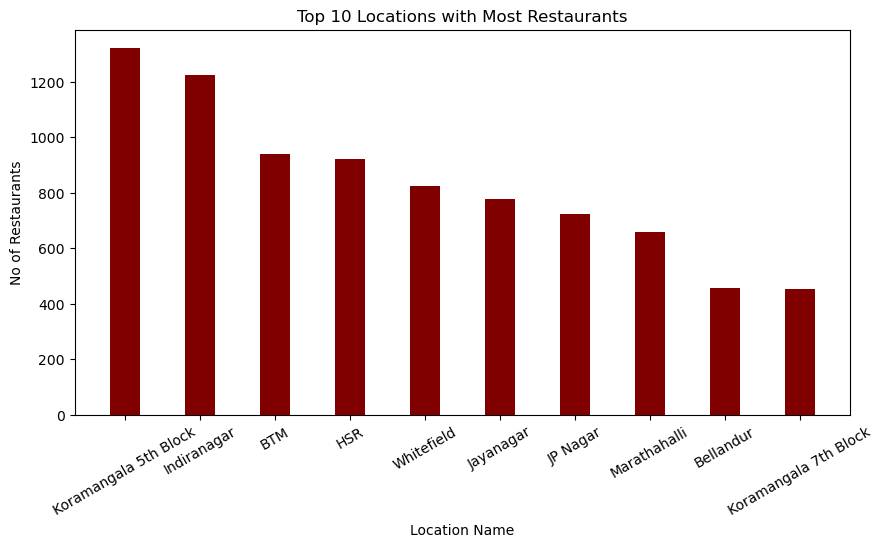

In [15]:
# top 10 locations with most restaurants
fig = plt.figure(figsize = (10, 5))
plt.bar(top_10.keys()[:10],top_10.values[:10], color ='maroon', width = 0.4)
plt.xticks(rotation=30)
plt.title("Top 10 Locations with Most Restaurants")
plt.ylabel("No of Restaurants")
plt.xlabel("Location Name")
plt.show()

In [16]:
data['rest_type'] = data['rest_type'].str.split(', ', expand=True)[0]

In [17]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery',
       'Dessert Parlor', 'Pub', 'Beverage Shop', 'Bar', 'Takeaway',
       'Food Truck', 'Bakery', 'Sweet Shop', 'Microbrewery', 'Lounge',
       'Food Court', 'Kiosk', 'Mess', 'Club', 'Fine Dining', 'Dhaba'],
      dtype=object)

Text(0.5, 1.0, 'Top 5 Casual Dining Restaurants')

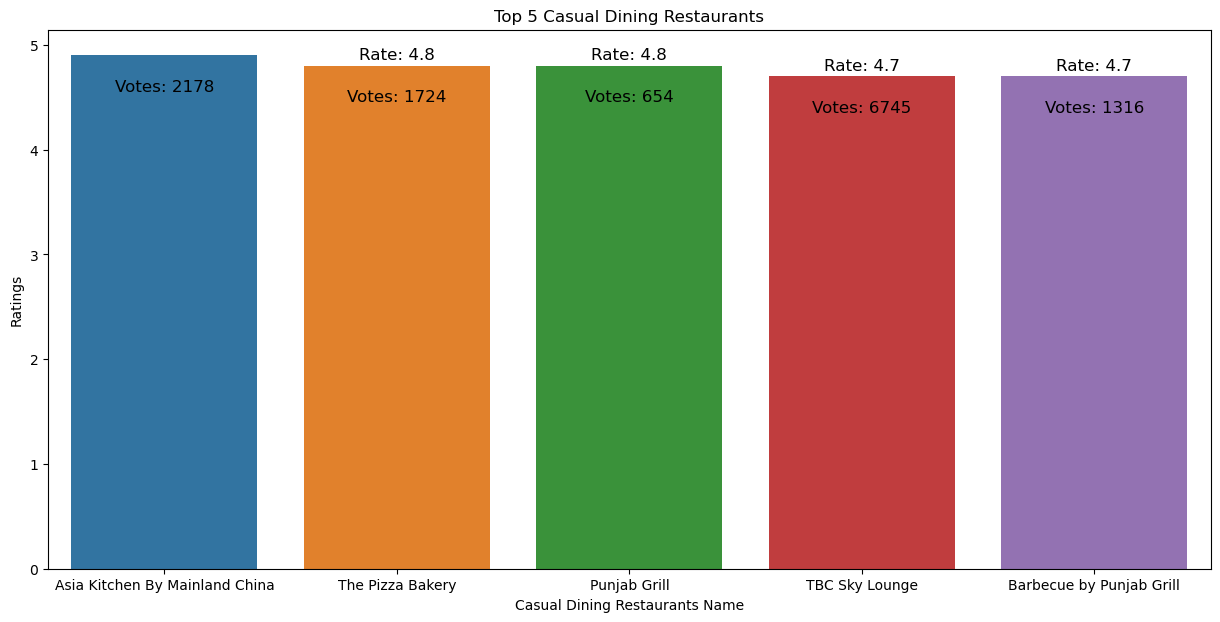

In [18]:
# top 5 casual dining restaurants
casual_dining = data[(data['rest_type'] == 'Casual Dining') & (data['votes']>=200)]
casual_dining.head()
casual_dining['rate'] = casual_dining['rate'].astype(float)
casual_dining_sorted = casual_dining.sort_values(by='rate', ascending=False)
casual_dining_sorted.drop_duplicates(subset='name',keep='last',inplace=True)
top_5_casual = casual_dining_sorted.iloc[1:6]
plt.figure(figsize=(15, 7))
plots = sns.barplot(x="name", y="rate", data=top_5_casual)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {top_5_casual["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {top_5_casual["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.3), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Casual Dining Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Casual Dining Restaurants')

Text(0.5, 1.0, 'Top 5 Cafes')

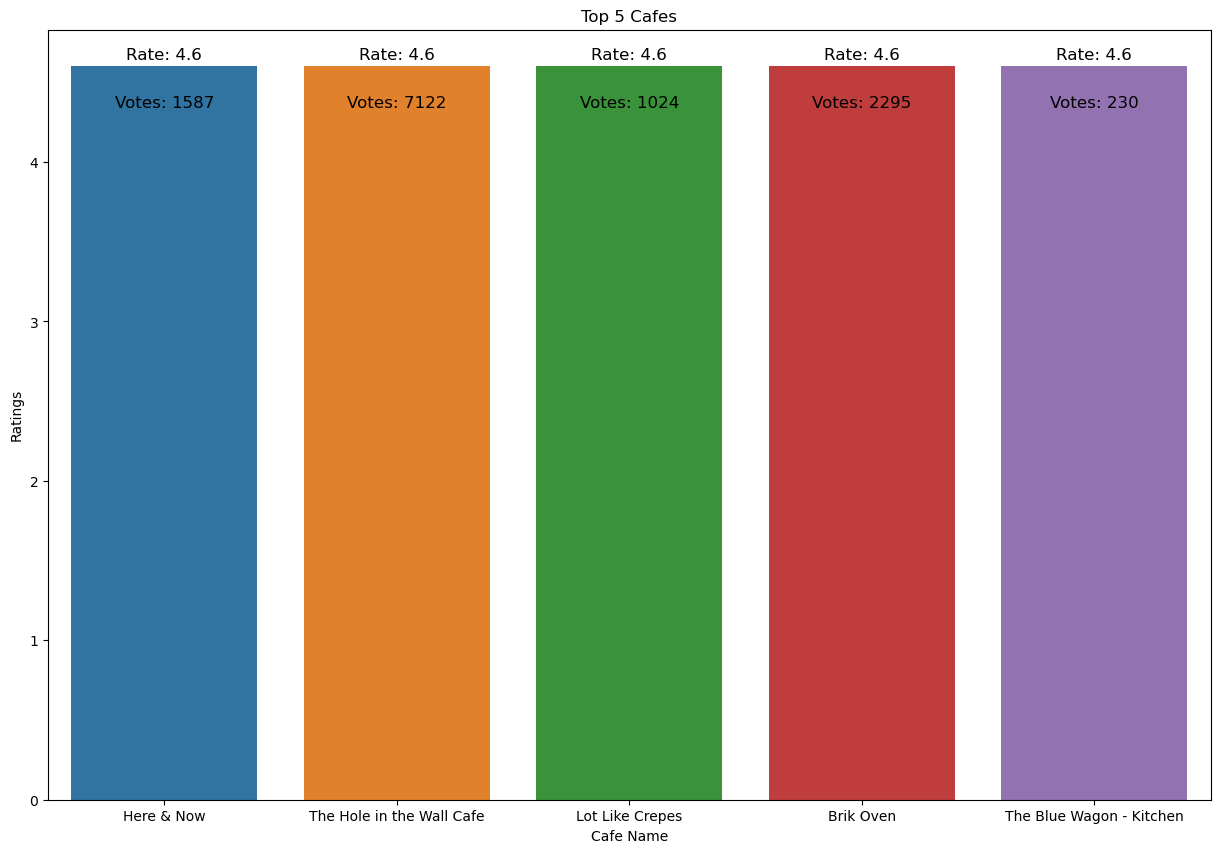

In [19]:
# top 5 cafe
cafe = data[(data['rest_type'] == 'Cafe') & (data['votes']>=200)]
cafe.head()
cafe['rate'] = cafe['rate'].astype(float)
cafe_sorted = cafe.sort_values(by='rate', ascending=False)
cafe_sorted.drop_duplicates(subset='name',keep='last',inplace=True)
top_5_cafe = cafe_sorted.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=top_5_cafe)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {top_5_cafe["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {top_5_cafe["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Cafe Name')
plt.ylabel('Ratings')
plt.title('Top 5 Cafes')

Text(0.5, 1.0, 'Top 5 Bakeries')

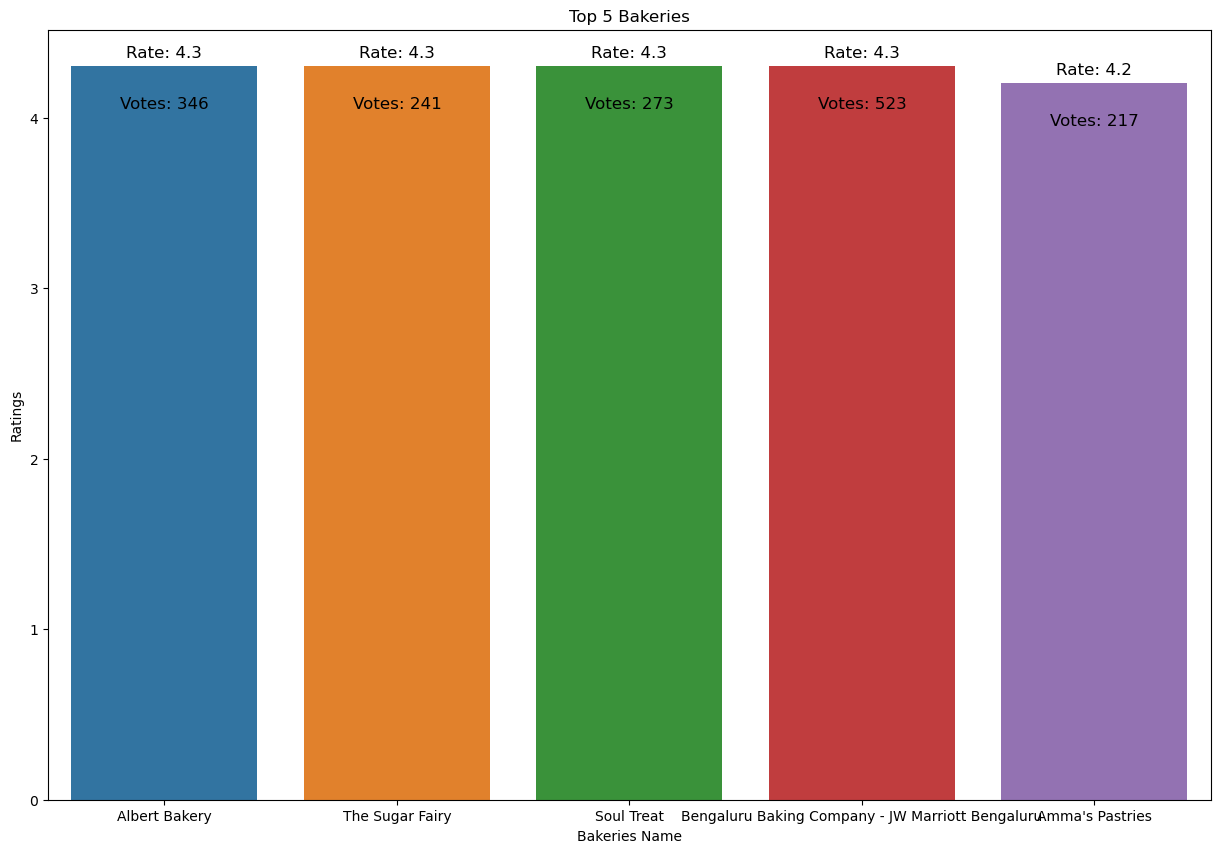

In [20]:
# top 5 Bakeries
bakery = data[(data['rest_type'] == 'Bakery') & (data['votes']>=200)]
bakery.head()
bakery['rate'] = bakery['rate'].astype(float)
bakery_sorted = bakery.sort_values(by='rate', ascending=False)
bakery_sorted.drop_duplicates(subset='name',keep='last',inplace=True)
top_5_bakery = bakery_sorted.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=top_5_bakery)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {top_5_bakery["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {top_5_bakery["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Bakeries Name')
plt.ylabel('Ratings')
plt.title('Top 5 Bakeries')

Text(0.5, 1.0, 'Top 5 Quick Bites Restaurants')

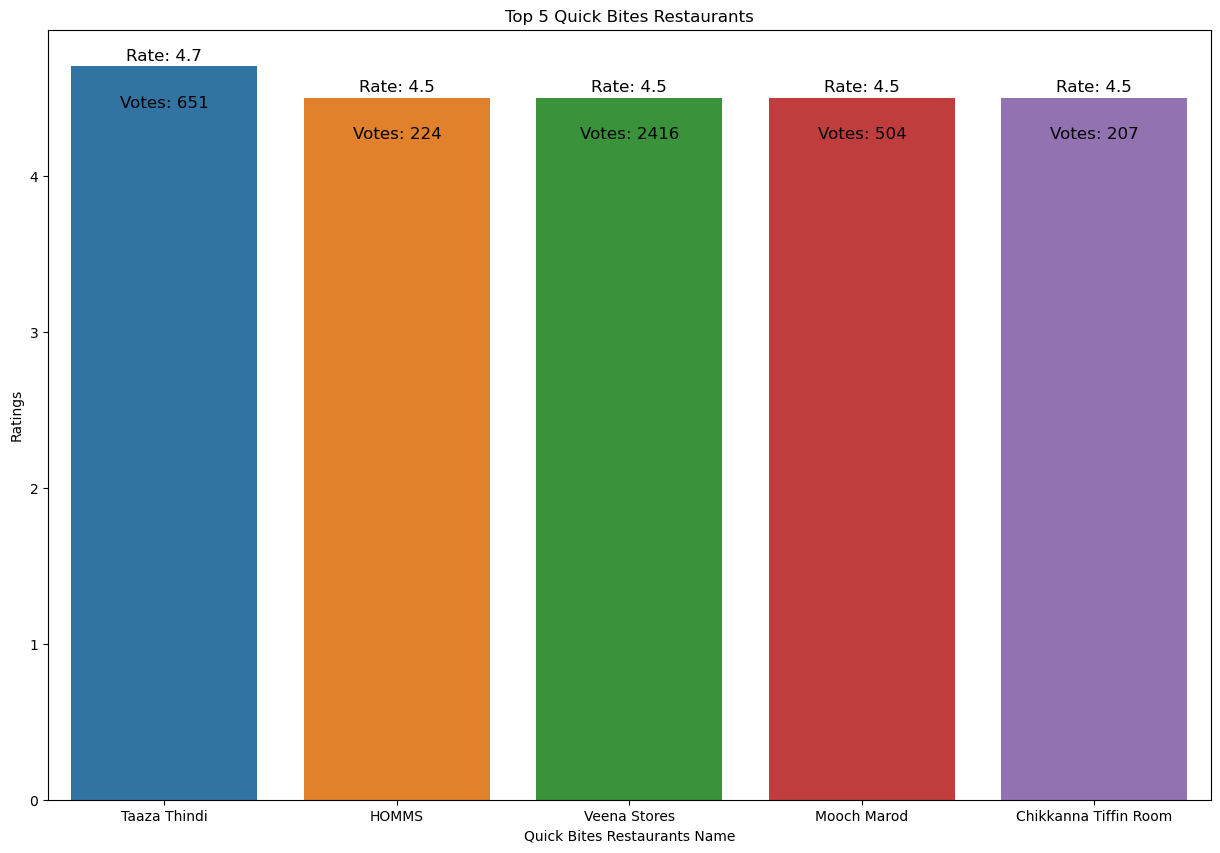

In [21]:
# top 5 Quick Bites Restaurants
quick_bites = data[(data['rest_type'] == 'Quick Bites') & (data['votes']>=200)]
quick_bites.head()
quick_bites['rate'] = quick_bites['rate'].astype(float)
quick_bites_sorted = quick_bites.sort_values(by='rate', ascending=False)
quick_bites_sorted.drop_duplicates(subset='name',keep='last',inplace=True)
top_5_quick_bites = quick_bites_sorted.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=top_5_quick_bites)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {top_5_quick_bites["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {top_5_quick_bites["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Quick Bites Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Quick Bites Restaurants')

Text(0.5, 1.0, 'Top 5 Dessert Parlor Restaurants')

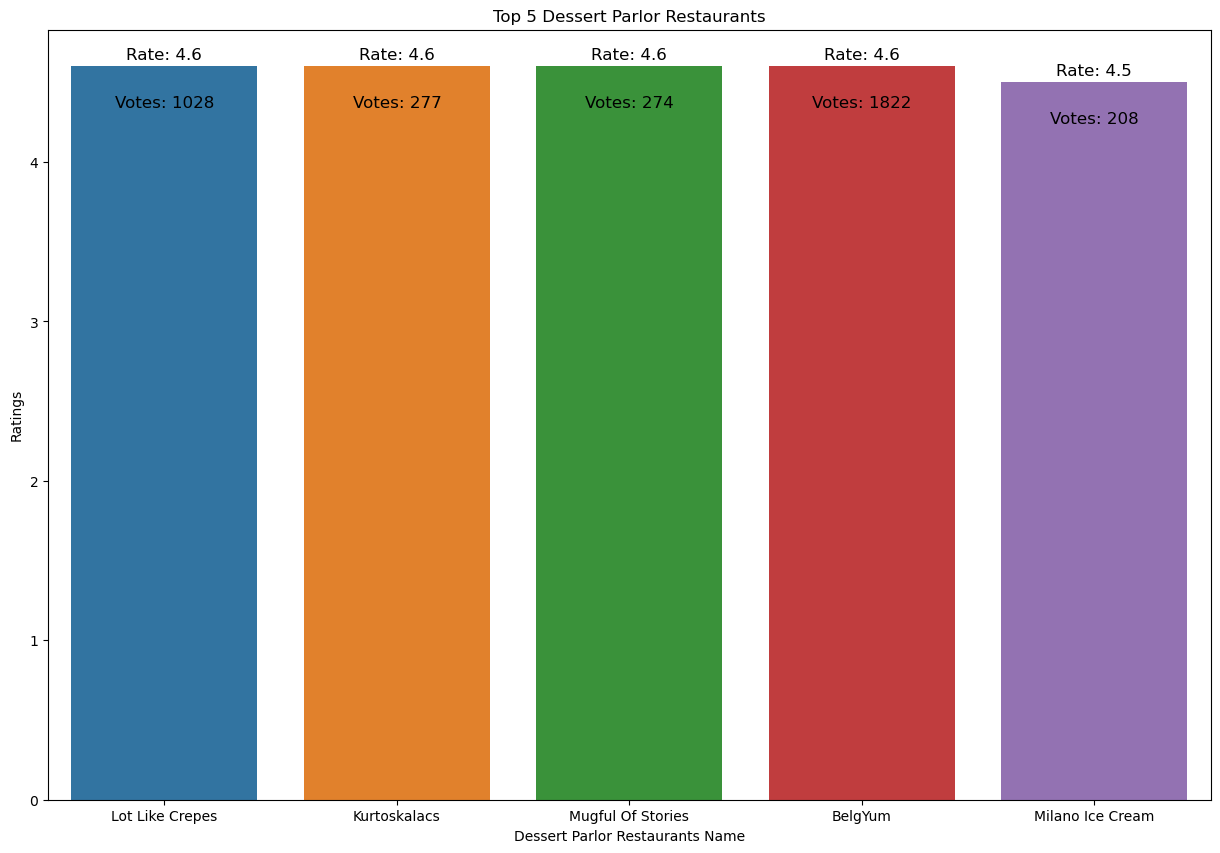

In [22]:
# top 5 Dessert Parlor Restaurants
dessert_parlor = data[(data['rest_type'] == 'Dessert Parlor') & (data['votes']>=200)]
dessert_parlor.head()
dessert_parlor['rate'] = dessert_parlor['rate'].astype(float)
dessert_parlor = dessert_parlor.sort_values(by='rate', ascending=False)
dessert_parlor.drop_duplicates(subset='name',keep='last',inplace=True)
top_5_dessert_palor = dessert_parlor.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=top_5_dessert_palor)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {top_5_dessert_palor["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {top_5_dessert_palor["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Dessert Parlor Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Dessert Parlor Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

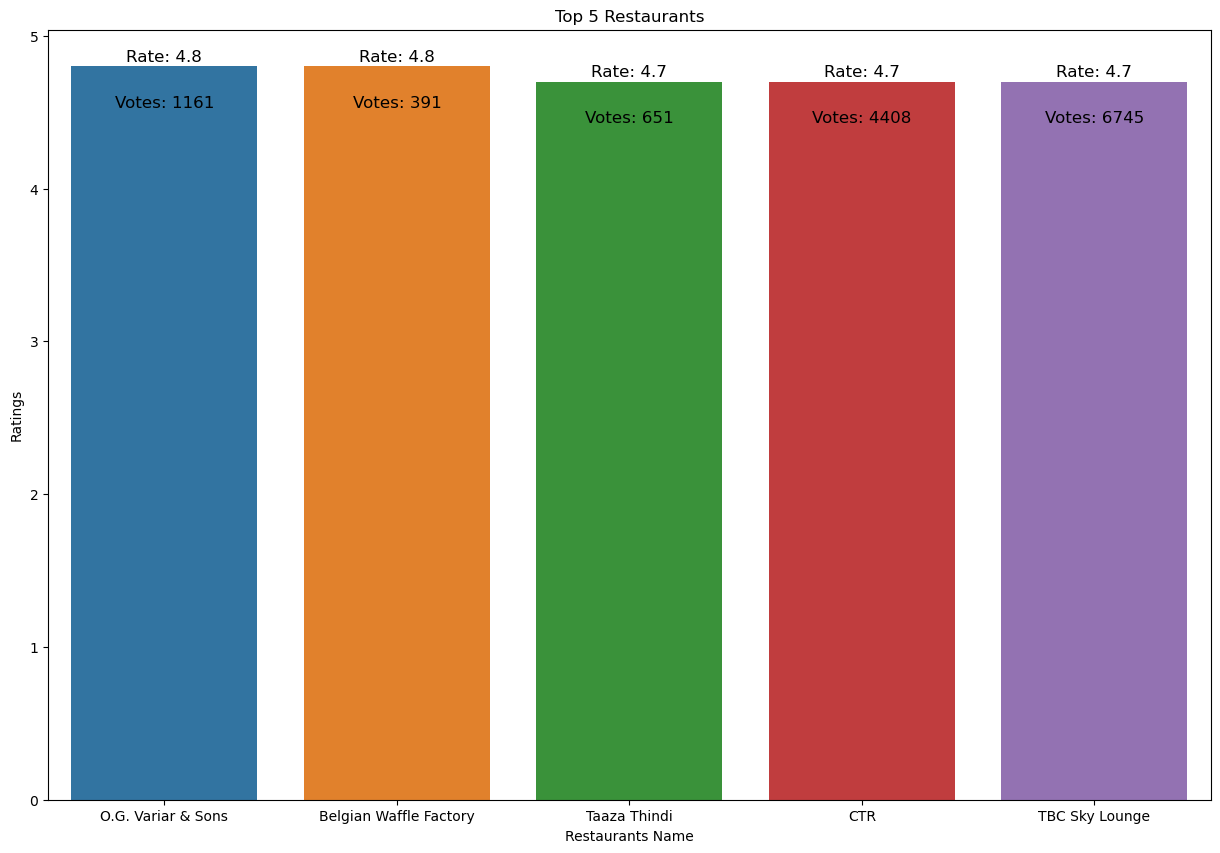

In [23]:
# top 5 restaurant range 100-1000
between_100_1000 = data[(data['approx_cost(for two people)'] >= 100) & (data['approx_cost(for two people)']<=1000)]
between_100_1000.head()
between_100_1000['rate'] = between_100_1000['rate'].astype(float)
between_100_1000 = between_100_1000.sort_values(by='rate', ascending=False)
between_100_1000.drop_duplicates(subset='name',keep='last',inplace=True)
between_100_1000_top_5 = between_100_1000.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_100_1000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_100_1000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_100_1000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

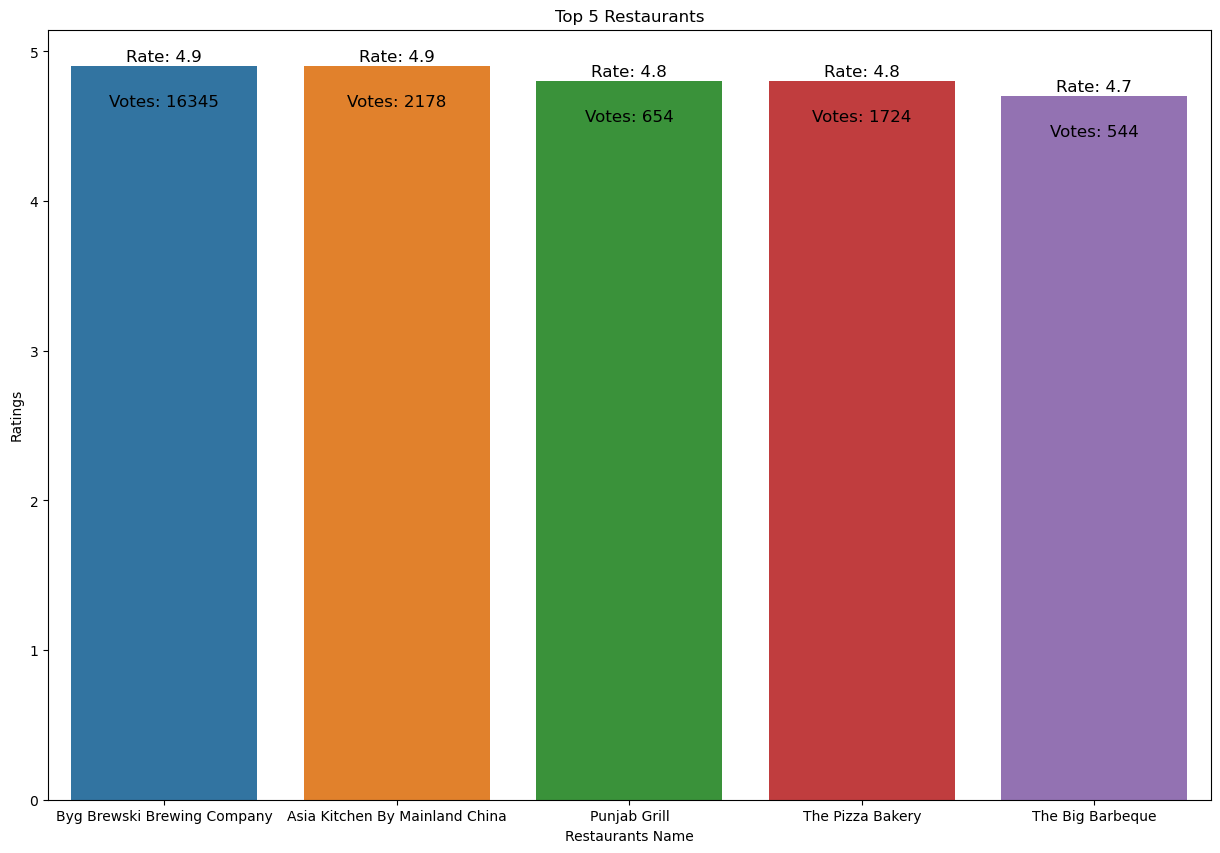

In [24]:
# top 5 restaurant range 1000-2000
between_1000_2000 = data[(data['approx_cost(for two people)'] >= 1000) & (data['approx_cost(for two people)']<=2000)]
between_1000_2000.head()
between_1000_2000['rate'] = between_1000_2000['rate'].astype(float)
between_1000_2000 = between_1000_2000.sort_values(by='rate', ascending=False)
between_1000_2000.drop_duplicates(subset='name',keep='last',inplace=True)
between_1000_2000_top_5 = between_1000_2000.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_1000_2000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_1000_2000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_1000_2000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

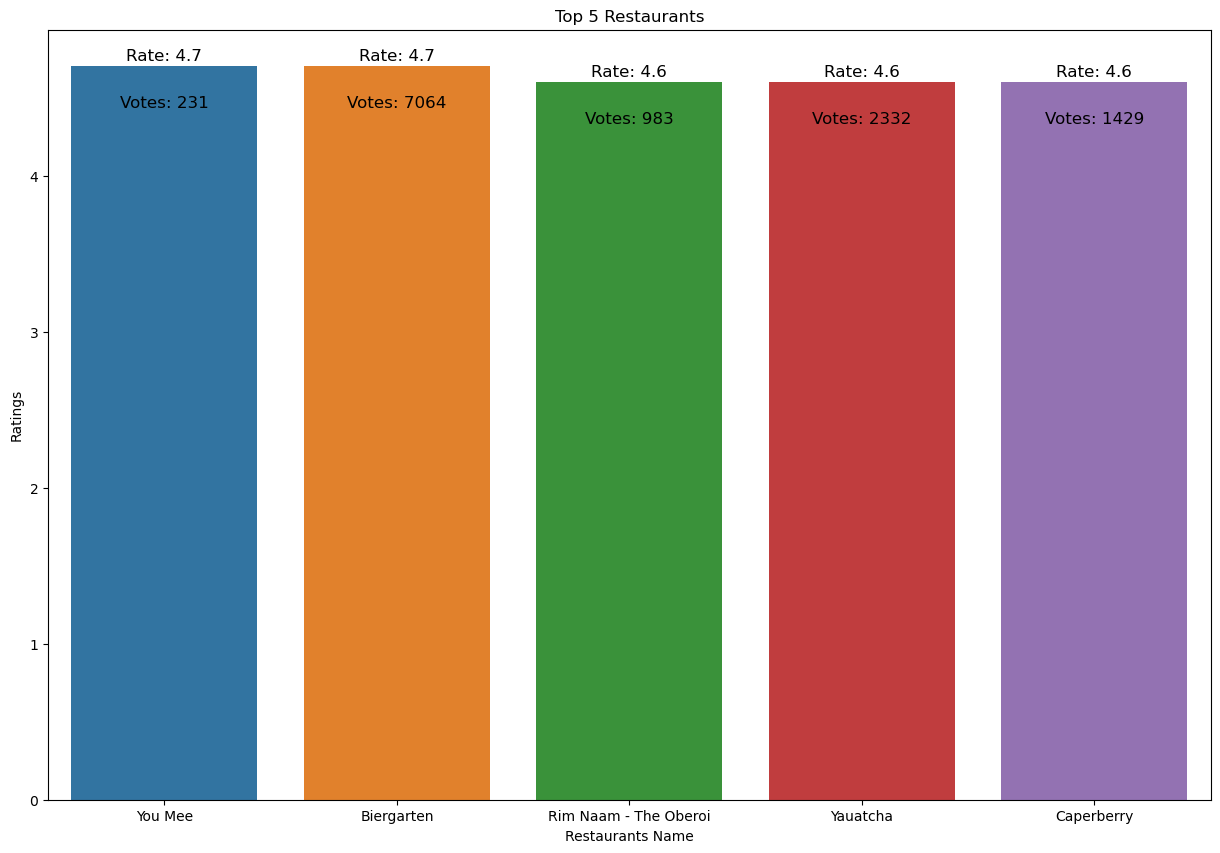

In [25]:
# top 5 restaurant range 2000-3000
between_2000_3000 = data[(data['approx_cost(for two people)'] >= 2000) & (data['approx_cost(for two people)']<=3000)]
between_2000_3000.head()
between_2000_3000['rate'] = between_2000_3000['rate'].astype(float)
between_2000_3000 = between_2000_3000.sort_values(by='rate', ascending=False)
between_2000_3000.drop_duplicates(subset='name',keep='last',inplace=True)
between_2000_3000_top_5 = between_2000_3000.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_2000_3000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_2000_3000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_2000_3000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

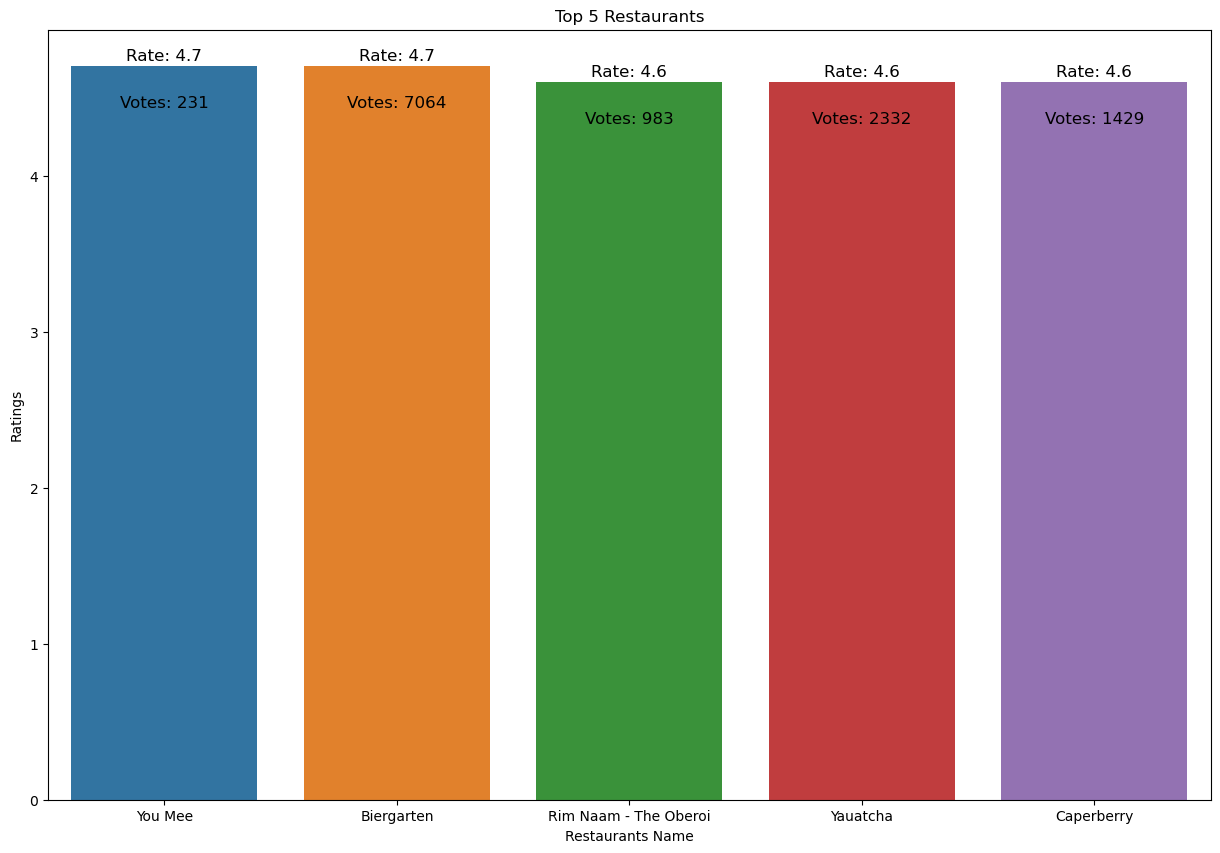

In [26]:
# top 5 restaurant range 3000-4000
between_3000_4000 = data[(data['approx_cost(for two people)'] >= 3000) & (data['approx_cost(for two people)']<=4000)]
between_3000_4000.head()
between_3000_4000['rate'] = between_3000_4000['rate'].astype(float)
between_3000_4000 = between_3000_4000.sort_values(by='rate', ascending=False)
between_3000_4000.drop_duplicates(subset='name',keep='last',inplace=True)
between_3000_4000_top_5 = between_3000_4000.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_2000_3000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_2000_3000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_2000_3000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

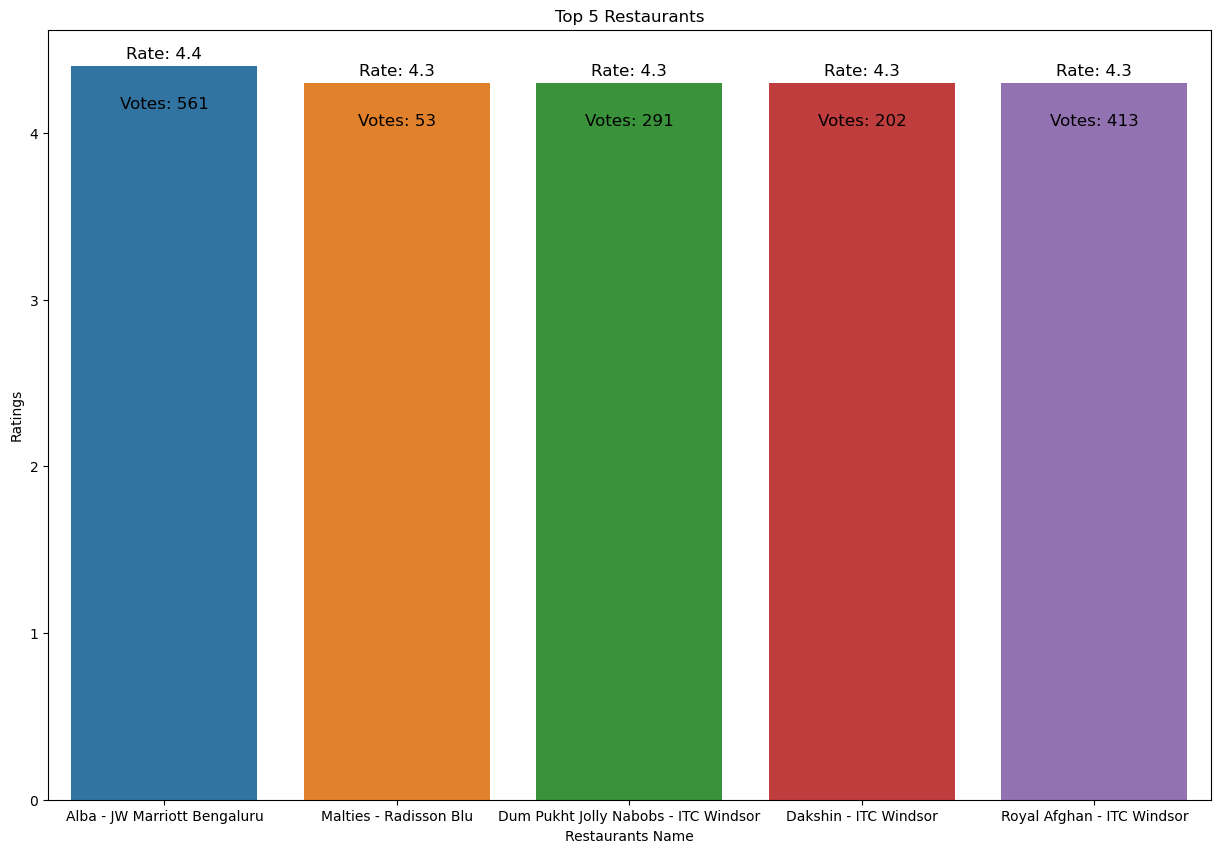

In [27]:
# top 5 restaurant range 4000-5000
between_4000_5000 = data[(data['approx_cost(for two people)'] >= 4000) & (data['approx_cost(for two people)']<=5000)]
between_4000_5000.head()
between_4000_5000['rate'] = between_4000_5000['rate'].astype(float)
between_4000_5000 = between_4000_5000.sort_values(by='rate', ascending=False)
between_4000_5000.drop_duplicates(subset='name',keep='last',inplace=True)
between_4000_5000_top_5 = between_4000_5000.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_4000_5000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_4000_5000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_4000_5000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

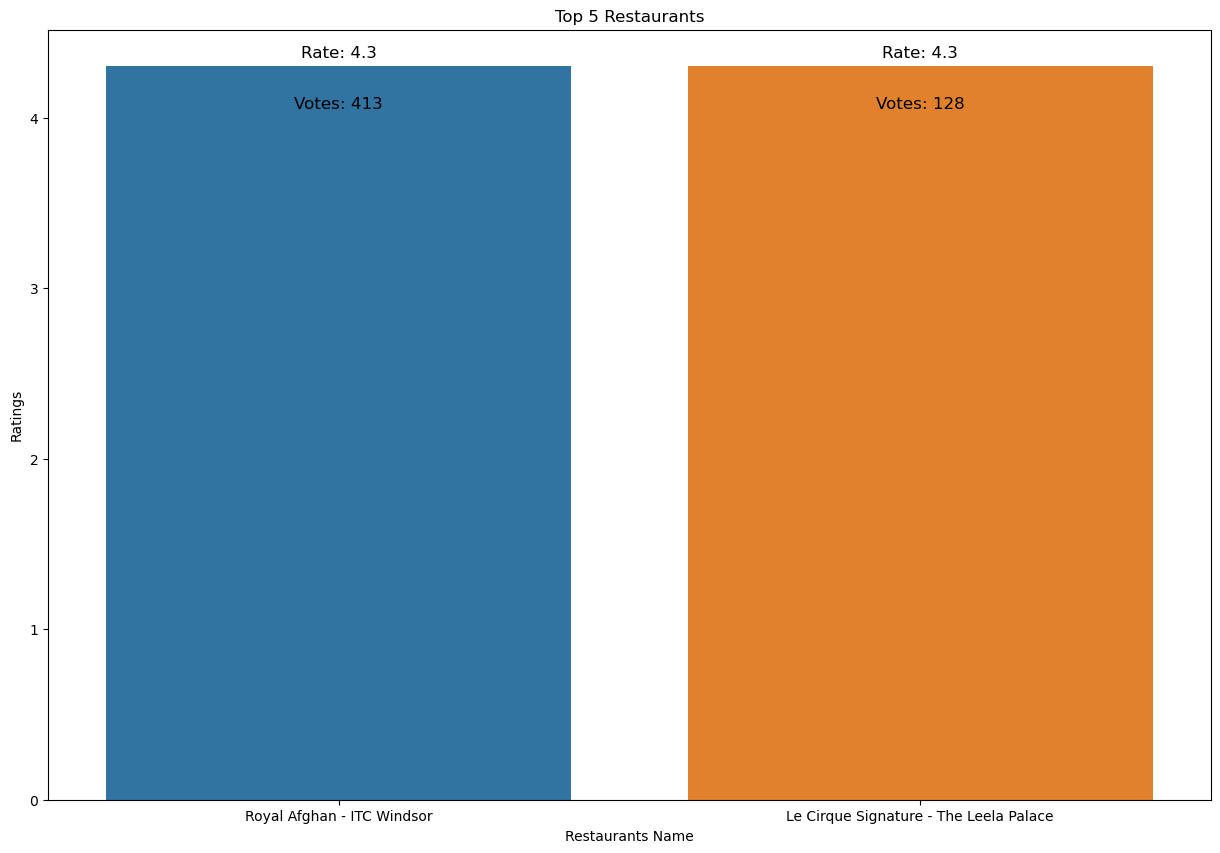

In [28]:
# top 5 restaurant range 5000-6000
between_5000_6000 = data[(data['approx_cost(for two people)'] >= 5000) & (data['approx_cost(for two people)']<=6000)]
between_5000_6000.head()
between_5000_6000['rate'] = between_5000_6000['rate'].astype(float)
between_5000_6000 = between_5000_6000.sort_values(by='rate', ascending=False)
between_5000_6000.drop_duplicates(subset='name',keep='last',inplace=True)
between_5000_6000_top_5 = between_5000_6000
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=between_5000_6000_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {between_5000_6000_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {between_5000_6000_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

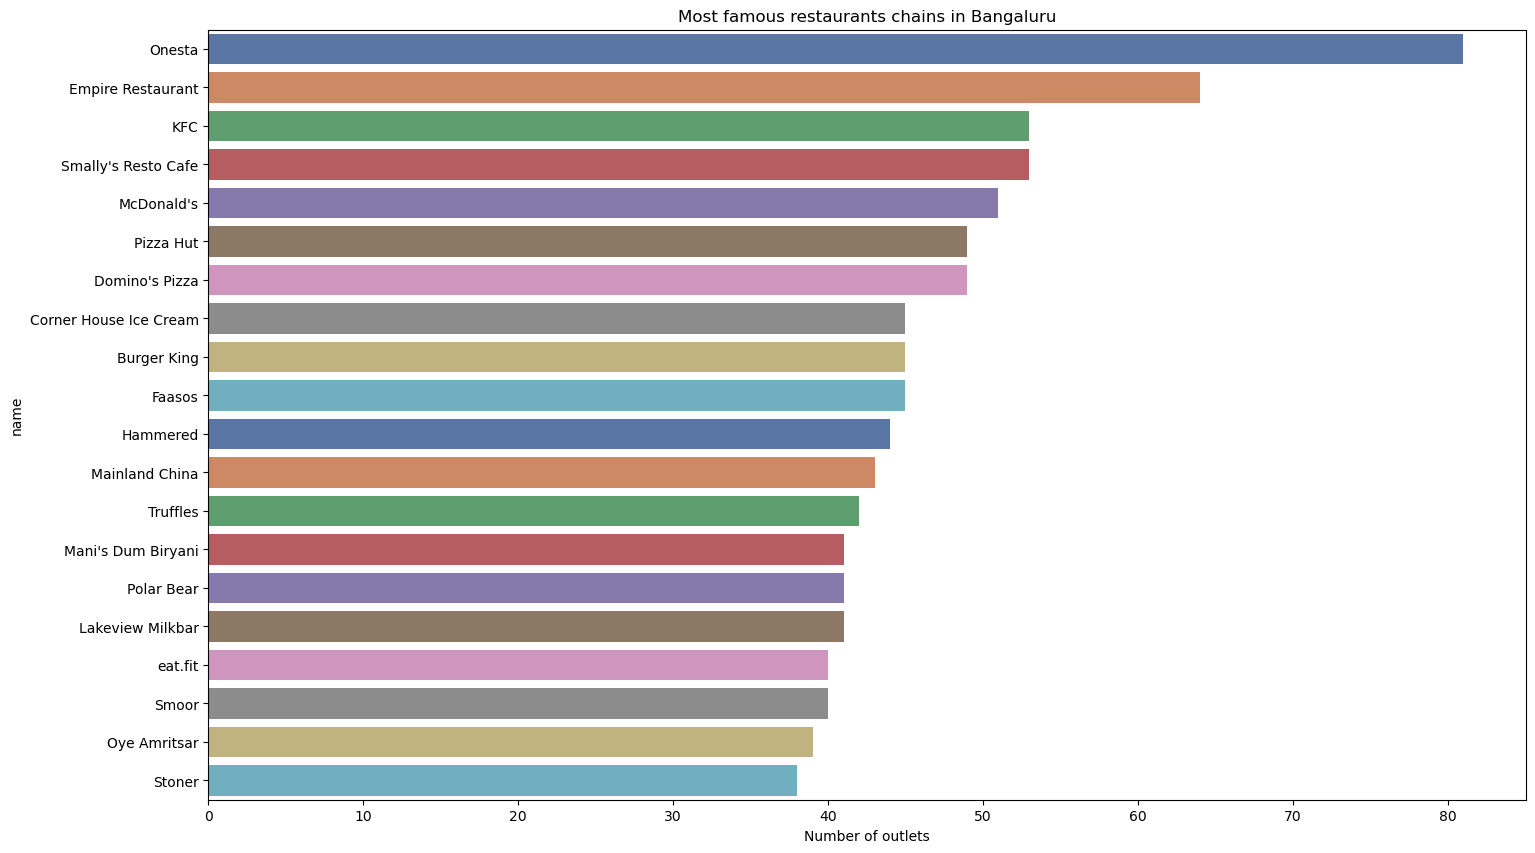

In [29]:
# most famous outlet chain
plt.figure(figsize=(17,10))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

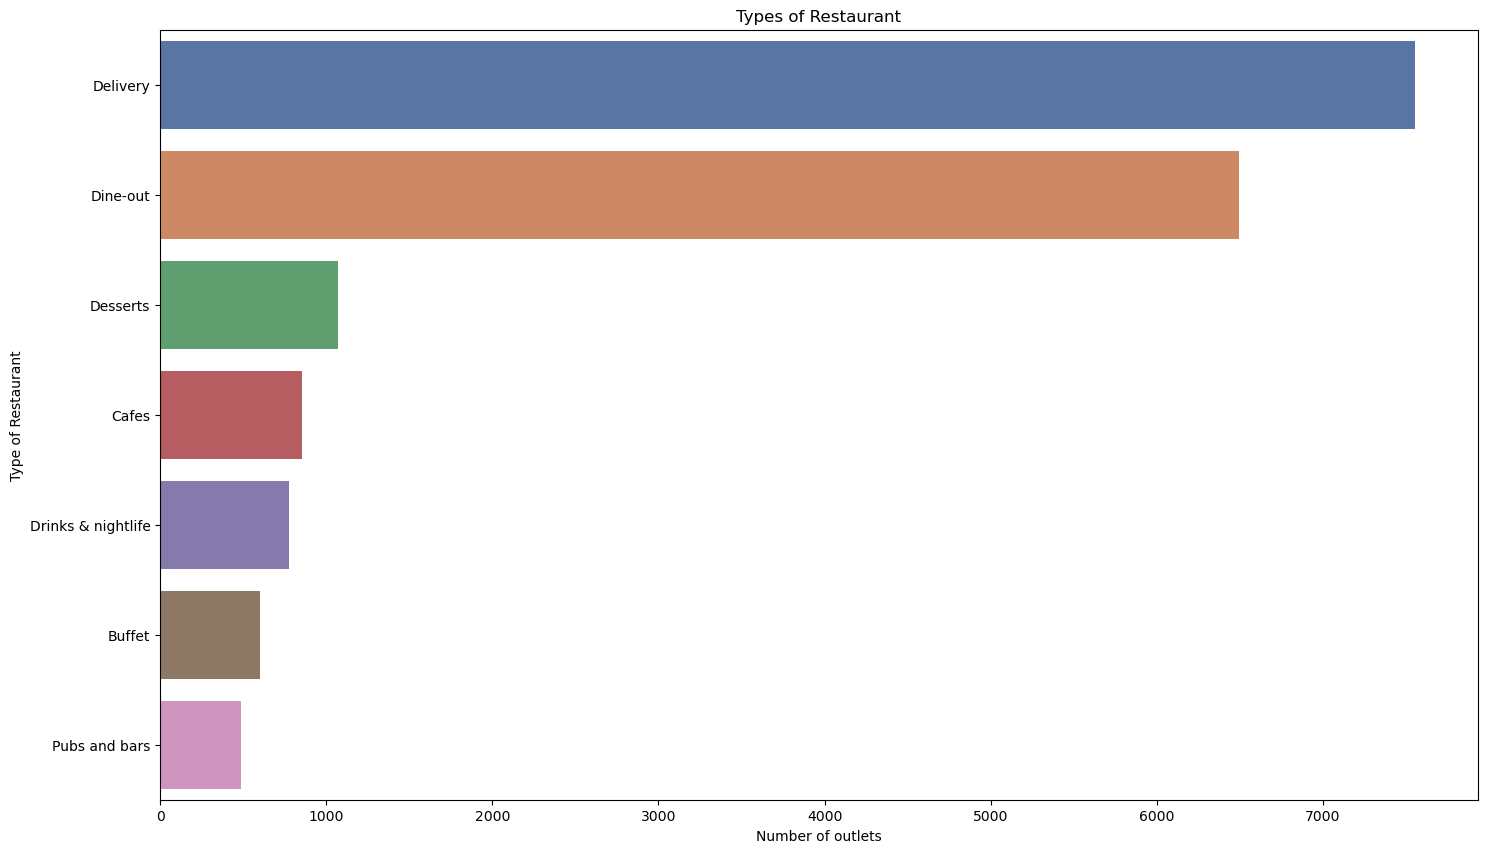

In [30]:
# type of service
plt.figure(figsize=(17,10))
chains=data['listed_in(type)'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Types of Restaurant")
plt.xlabel("Number of outlets")
plt.ylabel('Type of Restaurant')
plt.show()

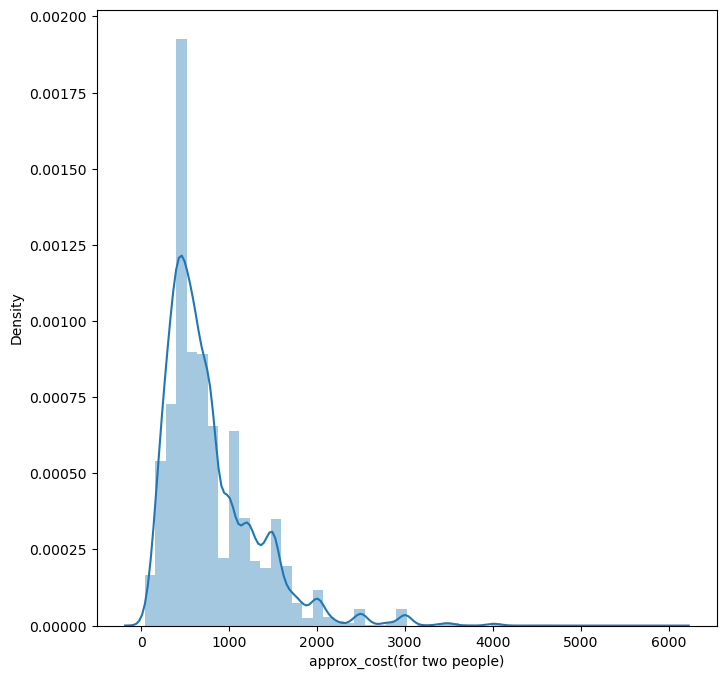

In [31]:
plt.figure(figsize=(8,8))
sns.distplot(data['approx_cost(for two people)'])
plt.show()

In [32]:
data['cuisines'] = data['cuisines'].str.split(', ')

In [33]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","[North Indian, Mughlai, Chinese]",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","[Chinese, North Indian, Thai]",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Cafe,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","[Cafe, Mexican, Italian]",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"[South Indian, North Indian]",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","[North Indian, Rajasthani]",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,Bar,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","[North Indian, Continental, Mediterranean]",1200,Pubs and bars
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,Fine Dining,Rooftop Ambience,[Finger Food],2000,Pubs and bars
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,Casual Dining,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...","[Chinese, Continental, North Indian]",1200,Pubs and bars
51711,Bhagini,No,No,2.5,81,Whitefield,Casual Dining,"Biryani, Andhra Meal","[Andhra, South Indian, Chinese, North Indian]",800,Pubs and bars


In [34]:
exploded_data = data.explode('cuisines')
cuisine_counts = exploded_data['cuisines'].value_counts()

In [35]:
cuisine_counts

cuisines
North Indian    7747
Chinese         5576
Continental     3502
Cafe            2789
Fast Food       2347
                ... 
Grill              5
Jewish             4
Vegan              4
Sindhi             4
Belgian            3
Name: count, Length: 97, dtype: int64

Text(0.5, 1.0, 'Top 5 Restaurants')

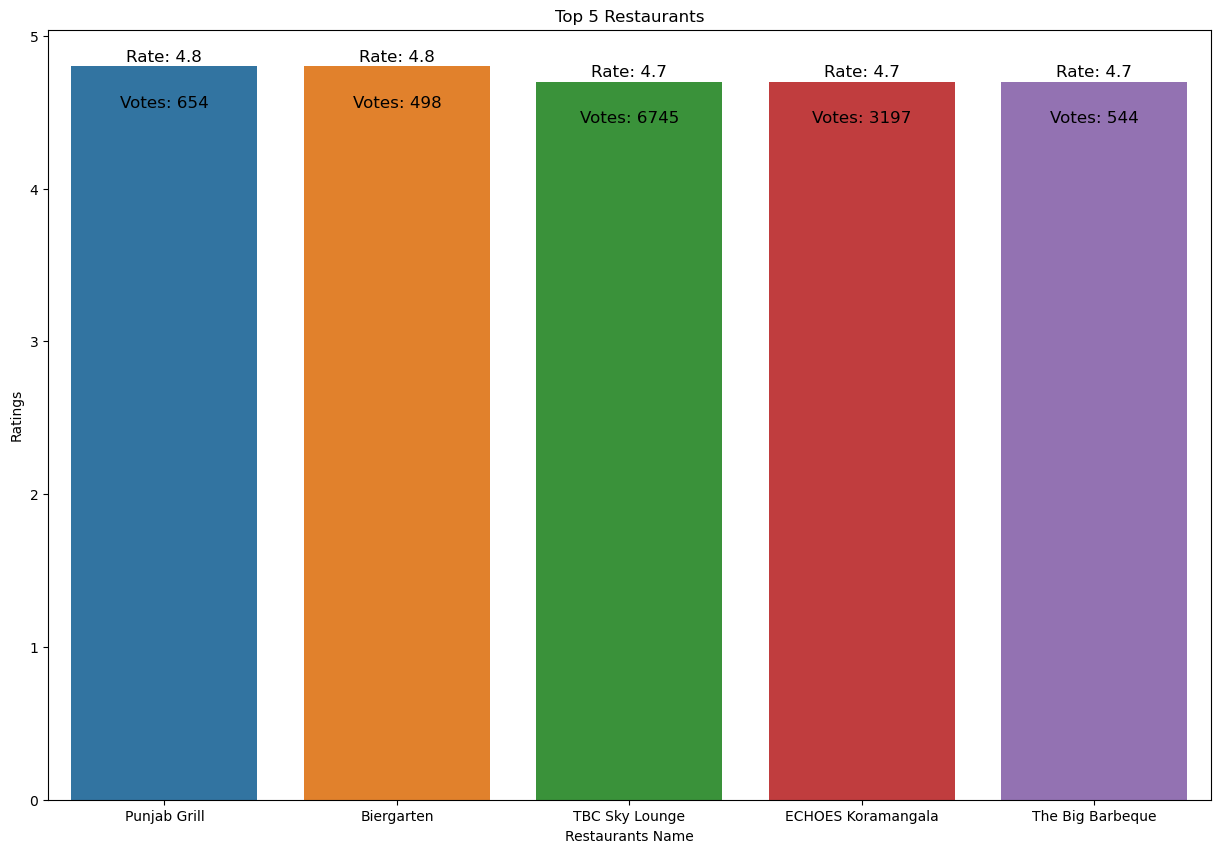

In [36]:
# top 5 North Indian Restaurants
north_indian_rest = exploded_data[exploded_data['cuisines']=='North Indian']
north_indian_rest['rate'] = north_indian_rest['rate'].astype(float)
north_indian_rest = north_indian_rest.sort_values(by='rate', ascending=False)
north_indian_rest.drop_duplicates(subset='name',keep='last',inplace=True)
north_indian_rest_top_5 = north_indian_rest.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=north_indian_rest_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {north_indian_rest_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {north_indian_rest_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

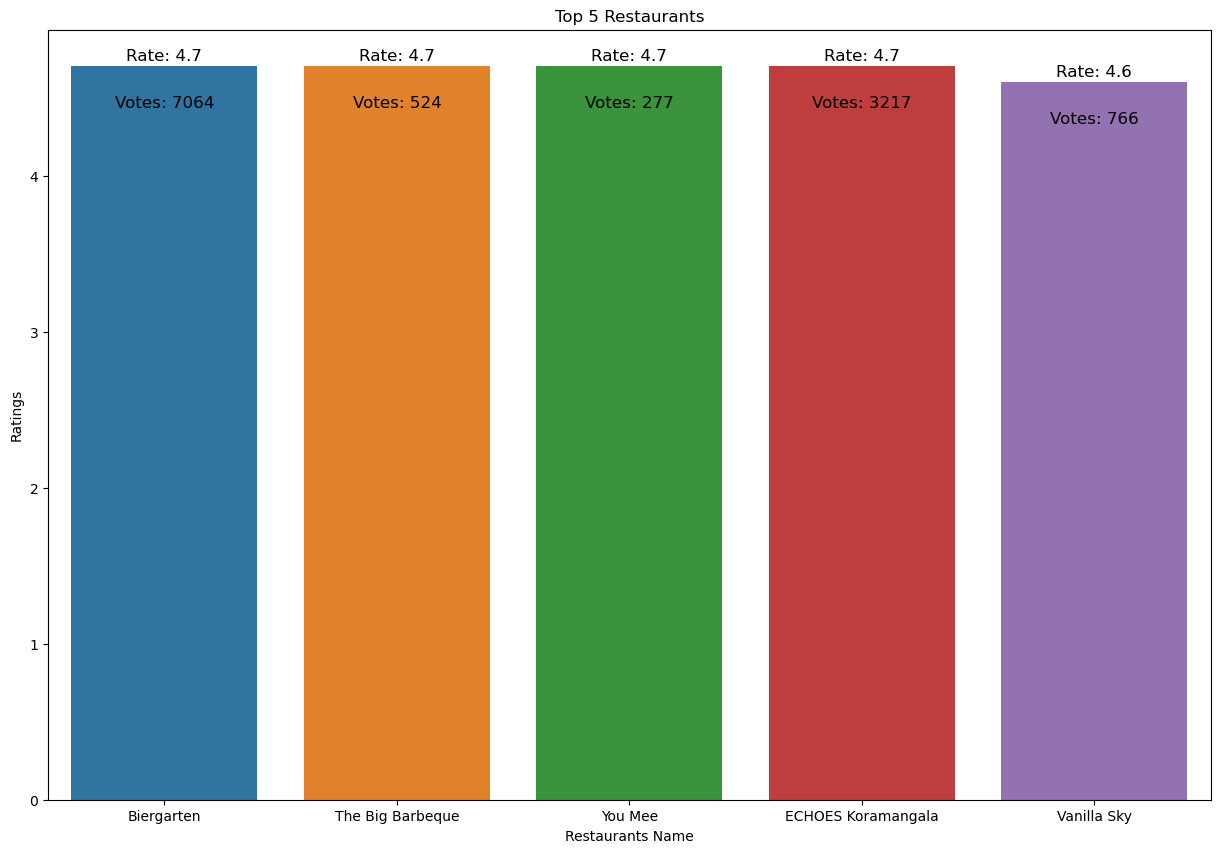

In [37]:
# top 5 Chinese Restaurants
chinese_rest = exploded_data[exploded_data['cuisines']=='Chinese']
chinese_rest['rate'] = chinese_rest['rate'].astype(float)
chinese_rest = chinese_rest.sort_values(by='rate', ascending=False)
chinese_rest.drop_duplicates(subset='name',keep='last',inplace=True)
chinese_rest_top_5 = chinese_rest.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=chinese_rest_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {chinese_rest_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {chinese_rest_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

Text(0.5, 1.0, 'Top 5 Restaurants')

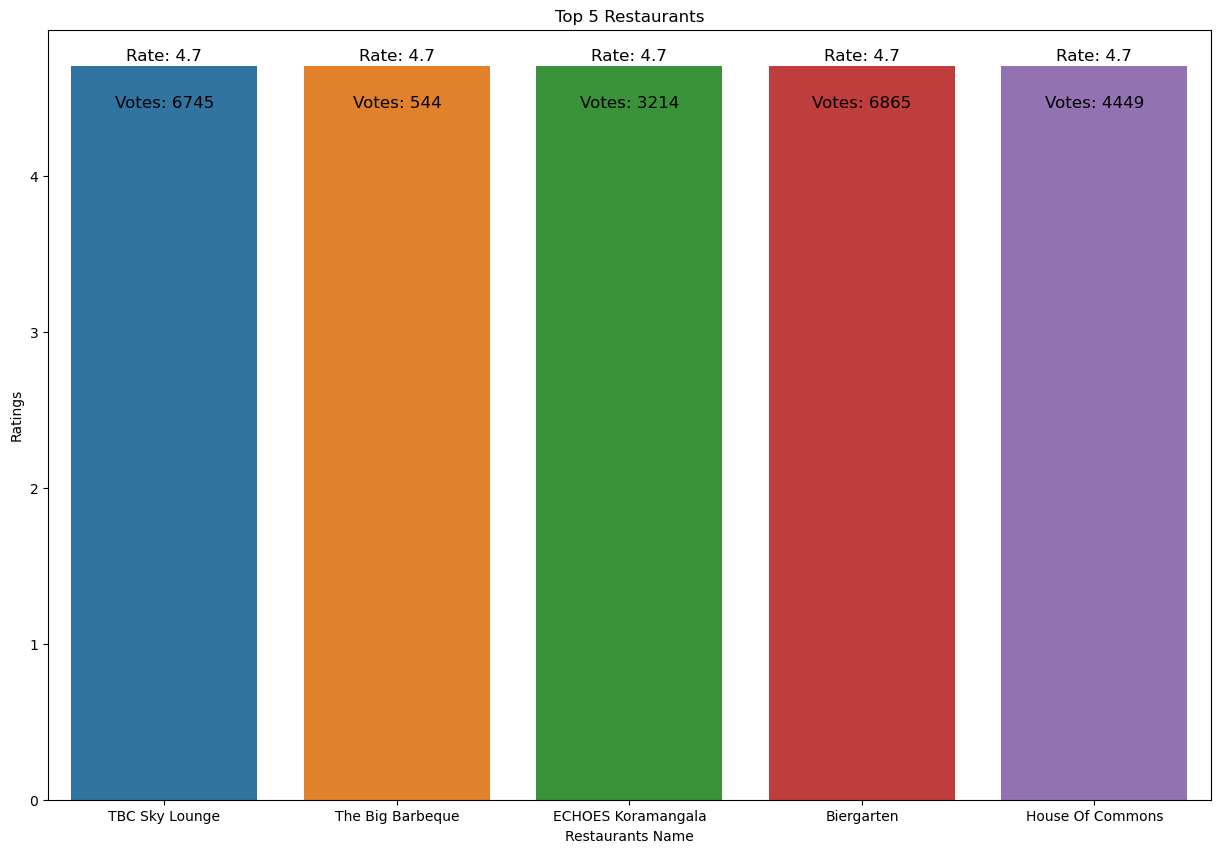

In [38]:
# top 5 Chinese Restaurants
continental_rest = exploded_data[exploded_data['cuisines']=='Continental']
continental_rest['rate'] = continental_rest['rate'].astype(float)
continental_rest = continental_rest.sort_values(by='rate', ascending=False)
continental_rest.drop_duplicates(subset='name',keep='last',inplace=True)
continental_rest_top_5 = continental_rest.iloc[1:6]
plt.figure(figsize=(15, 10))
plots = sns.barplot(x="name", y="rate", data=continental_rest_top_5)
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Votes: {continental_rest_top_5["votes"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() - 0.1), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
for i, bar in enumerate(plots.patches):
    plots.annotate(f'Rate: {continental_rest_top_5["rate"].iloc[i]}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 0.2), ha='center', va='center',
                   size=12, color='black', xytext=(0, -15),
                   textcoords='offset points')
plt.xlabel('Restaurants Name')
plt.ylabel('Ratings')
plt.title('Top 5 Restaurants')

In [39]:
data_ = data.copy()

In [40]:
data_.drop(['name','listed_in(type)','dish_liked'],axis=1,inplace=True)

In [41]:
data_['votes'] = data_['votes'].astype('int')
data_['rate'] = data_['rate'].astype('float')

In [42]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17830 entries, 0 to 51715
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 17830 non-null  object 
 1   book_table                   17830 non-null  object 
 2   rate                         17830 non-null  float64
 3   votes                        17830 non-null  int32  
 4   location                     17830 non-null  object 
 5   rest_type                    17830 non-null  object 
 6   cuisines                     17830 non-null  object 
 7   approx_cost(for two people)  17830 non-null  int32  
dtypes: float64(1), int32(2), object(5)
memory usage: 1.1+ MB


In [43]:
data_ = data_.explode('cuisines')
data_.reset_index(inplace=True)
data_.drop(['index'],inplace=True,axis=1)
data_

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800
2,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800
3,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
4,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800
...,...,...,...,...,...,...,...,...
51714,No,No,2.5,81,Whitefield,Casual Dining,Andhra,800
51715,No,No,2.5,81,Whitefield,Casual Dining,South Indian,800
51716,No,No,2.5,81,Whitefield,Casual Dining,Chinese,800
51717,No,No,2.5,81,Whitefield,Casual Dining,North Indian,800


In [44]:
data_

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,North Indian,800
1,Yes,Yes,4.1,775,Banashankari,Casual Dining,Mughlai,800
2,Yes,Yes,4.1,775,Banashankari,Casual Dining,Chinese,800
3,Yes,No,4.1,787,Banashankari,Casual Dining,Chinese,800
4,Yes,No,4.1,787,Banashankari,Casual Dining,North Indian,800
...,...,...,...,...,...,...,...,...
51714,No,No,2.5,81,Whitefield,Casual Dining,Andhra,800
51715,No,No,2.5,81,Whitefield,Casual Dining,South Indian,800
51716,No,No,2.5,81,Whitefield,Casual Dining,Chinese,800
51717,No,No,2.5,81,Whitefield,Casual Dining,North Indian,800


In [45]:
x = data_.drop(['approx_cost(for two people)'],axis=1)
y = data_['approx_cost(for two people)']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['online_order','book_table']),
    ('trf1',OrdinalEncoder(),['location','rest_type','cuisines'])
]
,remainder='passthrough')

In [48]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf', OneHotEncoder(drop='first'),
                                 ['online_order', 'book_table']),
                                ('trf1', OrdinalEncoder(),
                                 ['location', 'rest_type', 'cuisines'])])

In [49]:
x_train_ = pd.DataFrame(trf.transform(x_train),columns=x_train.columns)

In [50]:
x_train_

,online_order,book_table,rate,votes,location,rest_type,cuisines
0,1.0,0.0,41.0,3.0,44.0,4.1,65.0
1,1.0,0.0,35.0,4.0,79.0,3.9,420.0
2,1.0,0.0,35.0,4.0,4.0,3.9,219.0
3,1.0,0.0,37.0,6.0,20.0,3.9,582.0
4,0.0,0.0,42.0,3.0,44.0,4.4,159.0
...,...,...,...,...,...,...,...
41370,0.0,0.0,44.0,2.0,14.0,4.3,235.0
41371,1.0,0.0,26.0,3.0,44.0,4.1,424.0
41372,0.0,0.0,51.0,17.0,4.0,4.2,212.0
41373,0.0,0.0,1.0,17.0,14.0,3.8,70.0


In [51]:
x_test_ = pd.DataFrame(trf.transform(x_test),columns=x_train.columns)
x_test_

,online_order,book_table,rate,votes,location,rest_type,cuisines
0,1.0,0.0,42.0,19.0,16.0,4.1,360.0
1,0.0,1.0,48.0,4.0,68.0,4.2,337.0
2,0.0,1.0,41.0,15.0,71.0,4.4,1244.0
3,1.0,0.0,22.0,3.0,22.0,4.0,128.0
4,1.0,0.0,22.0,17.0,41.0,4.2,850.0
...,...,...,...,...,...,...,...
10339,0.0,1.0,28.0,4.0,49.0,4.7,3855.0
10340,1.0,1.0,12.0,3.0,22.0,4.2,937.0
10341,1.0,0.0,7.0,4.0,26.0,3.6,65.0
10342,1.0,0.0,78.0,3.0,20.0,4.2,382.0


In [52]:
from sklearn.ensemble import  ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train_,y_train)

ExtraTreesRegressor()

In [53]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [54]:
y_pred_train = etr.predict(x_train_)
r2_score = r2_score(y_train,y_pred_train)
rsme = np.sqrt(mean_squared_error(y_train,y_pred_train))
mae = mean_absolute_error(y_train,y_pred_train)
mape = mean_absolute_percentage_error(y_pred_train,y_train)
r2_score,rsme,mae,mape

(0.999841457323519, 6.456757551877642, 0.4939499928067907, 0.10528644940981396)

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred_test = etr.predict(x_test_)
r2_score = r2_score(y_test,y_pred_test)
rsme = np.sqrt(mean_squared_error(y_test,y_pred_test))
mae = mean_absolute_error(y_test,y_pred_test)
mape = mean_absolute_percentage_error(y_pred_test,y_test)
r2_score,rsme,mae,mape

(0.9940616311116588, 40.119580693238944, 8.169349381283837, 1.595312166748842)

In [56]:
data.to_pickle('data.pkl')
continental_rest_top_5.to_pickle('continental_rest_top_5.pkl')
chinese_rest_top_5.to_pickle('chinese_rest_top_5.pkl')
north_indian_rest_top_5.to_pickle('north_indian_rest_top_5.pkl')
between_5000_6000_top_5.to_pickle('between_5000_6000_top_5.pkl')
between_4000_5000_top_5.to_pickle('between_4000_5000_top_5.pkl')
between_3000_4000_top_5.to_pickle('between_3000_4000_top_5.pkl')
between_2000_3000_top_5.to_pickle('between_2000_3000_top_5.pkl')
between_1000_2000_top_5.to_pickle('between_1000_2000_top_5.pkl')
between_100_1000_top_5.to_pickle('between_100_1000_top_5.pkl')
top_5_dessert_palor.to_pickle('top_5_dessert_palor.pkl')
top_5_quick_bites.to_pickle('top_5_quick_bites.pkl')
top_5_bakery.to_pickle('top_5_bakery.pkl')
top_5_cafe.to_pickle('top_5_cafe.pkl')
top_5_casual.to_pickle('top_5_casual.pkl')
top_10.to_pickle('top_10.pkl')

In [57]:
x_train

,online_order,book_table,rate,votes,location,rest_type,cuisines
30478,Yes,No,4.1,65,Koramangala 4th Block,Cafe,Italian
25153,Yes,No,3.9,420,Kammanahalli,Casual Dining,Seafood
25149,Yes,No,3.9,219,Kammanahalli,Casual Dining,Andhra
9604,Yes,No,3.9,582,Koramangala,Delivery,Burger
9437,No,No,4.4,159,Koramangala 5th Block,Cafe,Italian
...,...,...,...,...,...,...,...
11284,No,No,4.3,235,Koramangala 7th Block,Beverage Shop,Beverages
44732,Yes,No,4.1,424,Indiranagar,Cafe,Italian
38158,No,No,4.2,212,Majestic,Quick Bites,Andhra
860,No,No,3.8,70,Banashankari,Quick Bites,Beverages


In [58]:
x_test

,online_order,book_table,rate,votes,location,rest_type,cuisines
26561,Yes,No,4.1,360,Koramangala 5th Block,Takeaway,Biryani
43467,No,Yes,4.2,337,Lavelle Road,Casual Dining,North Indian
33824,No,Yes,4.4,1244,Koramangala 4th Block,Microbrewery,Pizza
17491,Yes,No,4.0,128,HSR,Cafe,Cafe
29625,Yes,No,4.2,850,HSR,Quick Bites,Ice Cream
...,...,...,...,...,...,...,...
23444,No,Yes,4.7,3855,JP Nagar,Casual Dining,Kebab
6730,Yes,Yes,4.2,937,Church Street,Cafe,Cafe
16993,Yes,No,3.6,65,Bommanahalli,Casual Dining,Chinese
36286,Yes,No,4.2,382,Ulsoor,Cafe,Burger


In [59]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',ExtraTreesRegressor())
])

In [60]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['online_order',
                                                   'book_table']),
                                                 ('trf1', OrdinalEncoder(),
                                                  ['location', 'rest_type',
                                                   'cuisines'])])),
                ('step2', ExtraTreesRegressor())])

In [61]:
y_pred_train = pipe.predict(x_train)

In [63]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score = r2_score(y_train,y_pred_train)
rsme = np.sqrt(mean_squared_error(y_train,y_pred_train))
mae = mean_absolute_error(y_train,y_pred_train)
mape = mean_absolute_percentage_error(y_pred_train,y_train)
r2_score,rsme,mae,mape

(0.99984150588929, 6.455768539223209, 0.48845599194360545, 0.10374145540759137)

In [64]:
y_pred_test = pipe.predict(x_test)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score = r2_score(y_test,y_pred_test)
rsme = np.sqrt(mean_squared_error(y_test,y_pred_test))
mae = mean_absolute_error(y_test,y_pred_test)
mape = mean_absolute_percentage_error(y_pred_test,y_test)
r2_score,rsme,mae,mape

(0.9943563099246557, 39.111491457342666, 8.026736916731116, 1.566535840838741)

In [66]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [67]:
x_train

,online_order,book_table,rate,votes,location,rest_type,cuisines
30478,Yes,No,4.1,65,Koramangala 4th Block,Cafe,Italian
25153,Yes,No,3.9,420,Kammanahalli,Casual Dining,Seafood
25149,Yes,No,3.9,219,Kammanahalli,Casual Dining,Andhra
9604,Yes,No,3.9,582,Koramangala,Delivery,Burger
9437,No,No,4.4,159,Koramangala 5th Block,Cafe,Italian
...,...,...,...,...,...,...,...
11284,No,No,4.3,235,Koramangala 7th Block,Beverage Shop,Beverages
44732,Yes,No,4.1,424,Indiranagar,Cafe,Italian
38158,No,No,4.2,212,Majestic,Quick Bites,Andhra
860,No,No,3.8,70,Banashankari,Quick Bites,Beverages


In [68]:
x_train['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
x_train['book_table'].unique()

array(['No', 'Yes'], dtype=object)

In [70]:
x_train['location'].unique()

array(['Koramangala 4th Block', 'Kammanahalli', 'Koramangala',
       'Koramangala 5th Block', 'MG Road', 'JP Nagar', 'Domlur',
       'Richmond Road', 'Sadashiv Nagar', 'Jayanagar', 'Vasanth Nagar',
       'Koramangala 7th Block', 'Residency Road', 'Old Airport Road',
       'Whitefield', 'Marathahalli', 'New BEL Road', 'BTM', 'Frazer Town',
       'Koramangala 6th Block', 'Seshadripuram', 'Sarjapur Road',
       'Nagawara', 'Banashankari', 'St. Marks Road',
       'Koramangala 8th Block', 'Bellandur', 'HSR', 'Indiranagar',
       'Bommanahalli', 'Church Street', 'Malleshwaram', 'Brigade Road',
       'Electronic City', 'Brookefield', 'Shanti Nagar', 'Ulsoor',
       'Lavelle Road', 'Koramangala 1st Block', 'Bannerghatta Road',
       'Shivajinagar', 'Basavanagudi', 'Infantry Road', 'Cunningham Road',
       'Kalyan Nagar', 'Sankey Road', 'ITPL Main Road, Whitefield',
       'Commercial Street', 'Thippasandra', 'Koramangala 3rd Block',
       'Basaveshwara Nagar', 'Kaggadasapura', 'Ye

In [71]:
x_train['rest_type'].unique()

array(['Cafe', 'Casual Dining', 'Delivery', 'Bar', 'Lounge',
       'Quick Bites', 'Pub', 'Sweet Shop', 'Dessert Parlor',
       'Microbrewery', 'Bakery', 'Fine Dining', 'Beverage Shop',
       'Food Court', 'Takeaway', 'Club', 'Mess', 'Kiosk', 'Food Truck',
       'Dhaba'], dtype=object)

In [72]:
x_train['cuisines'].unique()

array(['Italian', 'Seafood', 'Andhra', 'Burger', 'Asian', 'Cafe',
       'Fast Food', 'BBQ', 'Mexican', 'North Indian', 'Desserts', 'Salad',
       'Chinese', 'Biryani', 'Continental', 'Mughlai', 'South Indian',
       'Mithai', 'Beverages', 'American', 'Thai', 'Japanese', 'Coffee',
       'Finger Food', 'Ice Cream', 'Pizza', 'Street Food', 'European',
       'Modern Indian', 'Arabian', 'Juices', 'Sandwich', 'Goan',
       'Vietnamese', 'Momos', 'Healthy Food', 'Hyderabadi', 'Rolls',
       'Bakery', 'Steak', 'Tibetan', 'Korean', 'Sri Lankan', 'Kerala',
       'Rajasthani', 'Tea', 'Mediterranean', 'Lucknowi', 'Mangalorean',
       'Bengali', 'Malaysian', 'Indonesian', 'Afghan', 'Kebab', 'Oriya',
       'Chettinad', 'Burmese', 'Singaporean', 'Bihari', 'Sushi',
       'Lebanese', 'Naga', 'Iranian', 'French', 'Tex-Mex', 'Greek',
       'Parsi', 'Nepalese', 'Wraps', 'Turkish', 'Russian',
       'Middle Eastern', 'Konkan', 'Bohri', 'Roast Chicken', 'Gujarati',
       'Spanish', 'African', '